# Import libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval
from pandas import json_normalize
from sklearn.metrics.pairwise import cosine_similarity
import warnings
from sklearn.preprocessing import LabelEncoder
from html import unescape

warnings.filterwarnings("ignore")

# Funcoes necessarias para o trabalho

In [ ]:
class top_recommender:
    def __init__(self, df ) :
        self.df=df
        
    def recommender_user(self, n:int)->pd.DataFrame:
        user_recommender=(self.df.groupby(["name", "anime_id"])
        .count()["user_id"]
        .reset_index()
        .rename({"user_id":"score"},axis=1)
        .sort_values(by="score", ascending=False)
        .head(n)
        )
        return user_recommender
    
    def recommender_type(self, n:int, type: int)->pd.DataFrame:
        if type==1:
            recommender_tv=(self.df.loc[self.df.type =="TV"]
            .groupby(["anime_id","name"])
            .count()["user_id"]
            .reset_index()
            .rename(columns={"user_id":"score"})
            .sort_values(by="score", ascending=False)
            .head(n))
            return recommender_tv
        elif type==2:
            recommender_movie=(self.df.loc[self.df.type =='Movie']
            .groupby(["anime_id","name"])
            .count()["user_id"]
            .reset_index()
            .rename(columns={"user_id":"score"})
            .sort_values(by="score", ascending=False)
            .head(n))
            return recommender_movie
        elif type==3:
            recommender_ova=(self.df.loc[self.df.type =='OVA']
            .groupby(["anime_id","name"])
            .count()["user_id"]
            .reset_index()
            .rename(columns={"user_id":"score"})
            .sort_values(by="score", ascending=False)
            .head(n))
            return recommender_ova
        elif type==4:
            recommender_special=(self.df.loc[self.df.type =='Special']
            .groupby(["anime_id","name"])
            .count()["user_id"]
            .reset_index()
            .rename(columns={"user_id":"score"})
            .sort_values(by="score", ascending=False)
            .head(n))
            return recommender_special
        elif type==5:
            recommender_ona=(self.df.loc[self.df.type =='ONA']
            .groupby(["anime_id","name"])
            .count()["user_id"]
            .reset_index()
            .rename(columns={"user_id":"score"})
            .sort_values(by="score", ascending=False)
            .head(n))
            return recommender_ona
        elif type==6:
            recommender_music=(self.df.loc[self.df.type =='Music']
            .groupby(["anime_id","name"])
            .count()["user_id"]
            .reset_index()
            .rename(columns={"user_id":"score"})
            .sort_values(by="score", ascending=False)
            .head(n))
            return recommender_music
        elif type==7:
            recommender_noclass=(self.df.loc[self.df.type =='No Class']
            .groupby(["anime_id","name"])
            .count()["user_id"]
            .reset_index()
            .rename(columns={"user_id":"score"})
            .sort_values(by="score", ascending=False)
            .head(n))
            return recommender_noclass
      
    def best_rating(self, n: int) -> pd.DataFrame:
        recomender_top_rating = (self.df.groupby(["name", "anime_id"])
                             .agg(rating=("rating", "mean"))
                             .reset_index()
                             .sort_values(by="rating", ascending=False)
                             .head(n))
        return recomender_top_rating

                            

In [4]:
#criando grafico
def plot_category_count( category:pd.Series,figsize=(16,12)):
    fig, ax= plt.subplots(figsize=figsize)
    ax.barh(category.index, category.values)
    ax.grid(True, linestyle="--")
    ax.set_xlabel("Count")
    return fig, ax

#criando funcao para separar o generos
def convert_genre_to_list(genre:str,separator=","):
    return genre.split(separator)

#grafico esparcidade
def plot_preferences_matrix(df_preference:pd.DataFrame, sparcity:float, figsize=(16,8)):
    fig, ax=plt.subplots(figsize=figsize)
    ax.spy(df_preference.values.T)
    ax.set_ylabel("Items")
    ax.set_xlabel("Users")
    ax.set_title("Preference Matrix( Overall sparcity {:.02f}%)".format(100*sparcity))

#grafico de distribuicao da esparcidade
def sparcity_distribution_plot( sparcity, ylabel, figsize=(16,12), bins=300):
    fig, ax=plt.subplots(figsize=figsize)
    ax.grid(True, linestyle="--")
    ax.hist(100*sparcity, bins=bins)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Sparsity")
    ax.set_xlim(right=100.0)
    xticks=matplotlib.ticker.FormatStrFormatter("%.0f%%")
    ax.xaxis.set_major_formatter(xticks)
    return fig, ax


# Importando datasets

In [136]:
#importando df
df_anime=pd.read_csv("/Users/chenyenpin/Documents/RECOMMENDER+STREAMLIT/dataframes/anime.csv",
                     usecols=["anime_id","name","genre","type"])
                      
df_rating=pd.read_csv("/Users/chenyenpin/Documents/RECOMMENDER+STREAMLIT/dataframes/rating.csv",
                      )

In [120]:
df_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [122]:
df_rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [123]:
#substituindo valores -1 por Na
df_rating.rating=df_rating.rating.replace({-1:np.nan})

In [124]:
df_rating

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN
...,...,...,...
7813732,73515,16512,7.0
7813733,73515,17187,9.0
7813734,73515,22145,10.0
7813735,73516,790,9.0


In [77]:
df_anime[df_anime["anime_id"]==6]

,anime_id,name,genre,type
214,6,Trigun,"Action, Comedy, Sci-Fi",TV


In [125]:
df_anime[df_anime.isna().any(axis=1)]

,anime_id,name,genre,type
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special
3541,33589,ViVid Strike!,NaN,TV
6040,29765,Metropolis (2009),NaN,Movie
6646,32695,Match Shoujo,NaN,ONA
7018,33187,Katsudou Shashin,NaN,Movie
...,...,...,...,...
11101,33478,UQ Holder!,"Action, Fantasy, Magic, Sci-Fi, Shounen",NaN
11112,33035,Yuyushiki Special,NaN,Special
11113,33390,Zunda Horizon,NaN,Movie
12252,34382,Citrus,"Drama, Romance, School, Yuri",NaN


In [127]:
df_anime

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
12290,5543,Under World,Hentai,OVA
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [138]:

df_anime['name'] = df_anime['name'].apply(lambda x: unescape(str(x)))

# Now, remove other special characters using a regular expression
df_anime['name'] = df_anime['name'].str.replace('[^a-zA-Z0-9\s]', '')

# Print the updated DataFrame
df_anime

,anime_id,name,genre,type
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,SteinsGate,"Sci-Fi, Thriller",TV
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...
12289,9316,Toushindai My Lover Minami tai MechaMinami,Hentai,OVA
12290,5543,Under World,Hentai,OVA
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA
12292,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA


In [45]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


### Data Wrangling e Data Cleaning

In [139]:
df_anime['name'] = df_anime['name'].apply(lambda x: unescape(str(x)))

# Now, remove other special characters using a regular expression
df_anime['name'] = df_anime['name'].str.replace('[^a-zA-Z0-9\s]', '')

# Print the updated DataFrame
df_anime

,anime_id,name,genre,type
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,SteinsGate,"Sci-Fi, Thriller",TV
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...
12289,9316,Toushindai My Lover Minami tai MechaMinami,Hentai,OVA
12290,5543,Under World,Hentai,OVA
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA
12292,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA


In [140]:
#mudando os tipo de dados
df_rating=df_rating.astype({"user_id":"int32","anime_id":"int32","rating":"int32"})

In [141]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int32
 1   anime_id  int32
 2   rating    int32
dtypes: int32(3)
memory usage: 89.4 MB


In [142]:
df_anime=df_anime.astype({"anime_id":"int16"})
df_anime.genre=df_anime["genre"].astype("str")

In [143]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  12294 non-null  int16 
 1   name      12294 non-null  object
 2   genre     12294 non-null  object
 3   type      12269 non-null  object
dtypes: int16(1), object(3)
memory usage: 312.3+ KB


In [144]:
#transformando a coluna genre para lista

df_anime["genre_list"]=df_anime.genre.apply(convert_genre_to_list)
df_anime.head()

,anime_id,name,genre,type,genre_list
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,"[Action, Adventure, Drama, Fantasy, Magic,..."
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"[Action, Comedy, Historical, Parody, Samur..."
3,9253,SteinsGate,"Sci-Fi, Thriller",TV,"[Sci-Fi, Thriller]"
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"[Action, Comedy, Historical, Parody, Samur..."


In [145]:
genres=(df_anime.
        explode("genre_list")
        .groupby("genre_list")
        .count()["anime_id"]
        .sort_values(ascending=False)
        .head(20))

In [12]:
genres

genre_list
Comedy            3193
Action            2845
 Sci-Fi           1986
 Fantasy          1815
 Shounen          1663
Adventure         1457
 Comedy           1452
 Romance          1371
 Kids             1213
 School           1170
 Slice of Life    1117
 Drama            1025
 Supernatural     1023
Drama              991
Hentai             947
 Adventure         891
 Mecha             826
 Magic             716
 Historical        636
 Shoujo            590
Name: anime_id, dtype: int64

In [146]:
#substituindo o valor -1 para Nan
df_rating.rating=df_rating.rating.replace({-1:None})

(<Figure size 1600x1200 with 1 Axes>, <AxesSubplot:xlabel='Count'>)

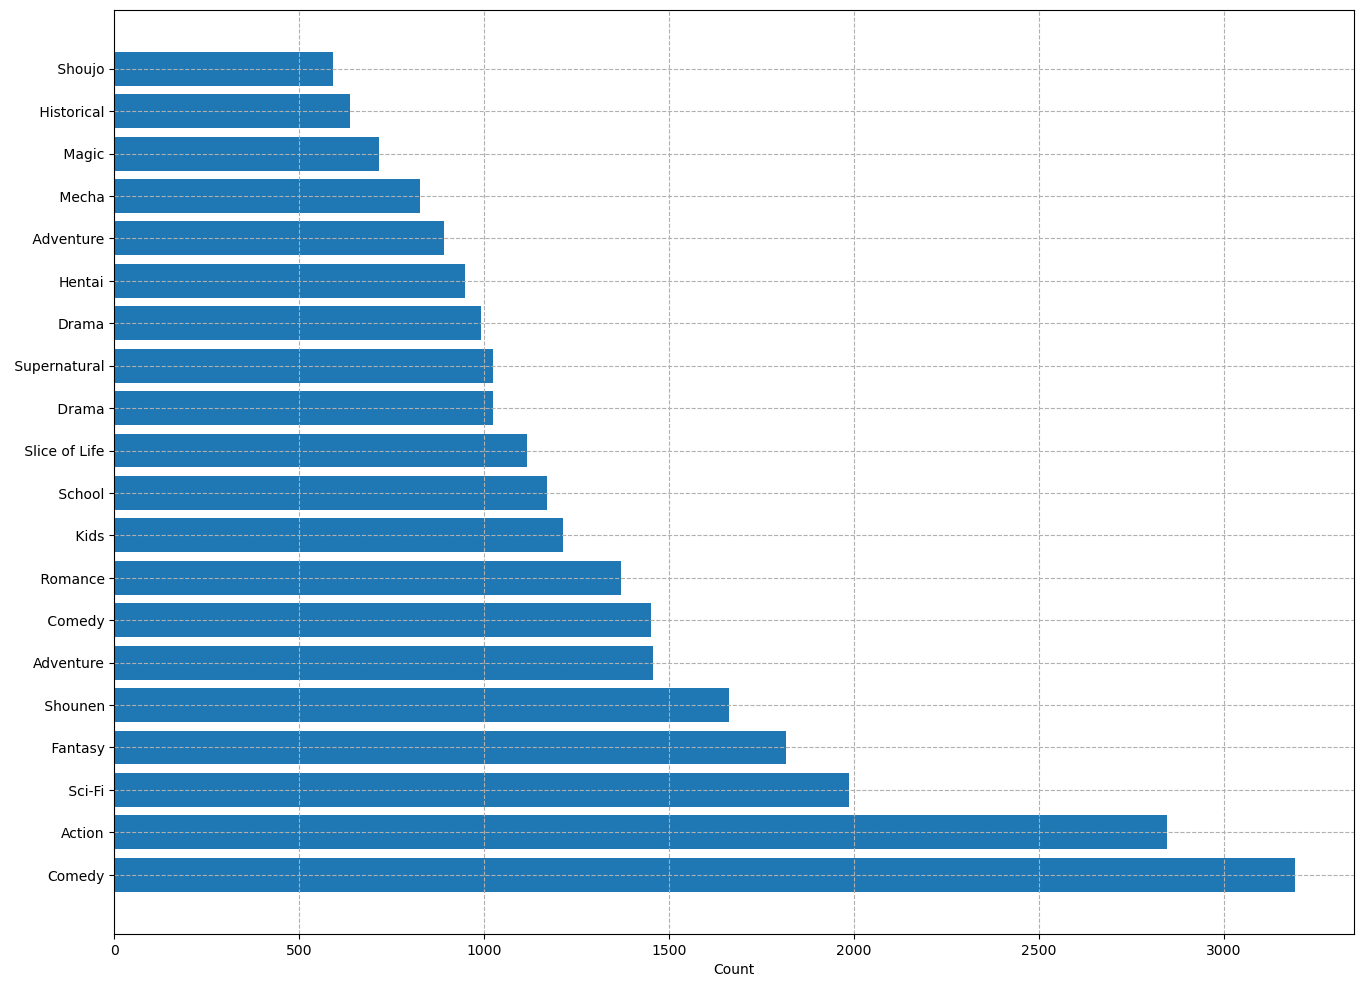

In [147]:
plot_category_count(genres)

In [148]:
df_anime.head()

,anime_id,name,genre,type,genre_list
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,"[Action, Adventure, Drama, Fantasy, Magic,..."
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"[Action, Comedy, Historical, Parody, Samur..."
3,9253,SteinsGate,"Sci-Fi, Thriller",TV,"[Sci-Fi, Thriller]"
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"[Action, Comedy, Historical, Parody, Samur..."


In [16]:
type=(df_anime.
        explode("genre_list")
        .groupby("type")
        .count()["anime_id"]
        .sort_values(ascending=False)
        .head(20))

In [149]:
#total de tipos de Anime
type

type
TV         13458
OVA         8959
Movie       6744
Special     4856
ONA         1398
Music        866
Name: anime_id, dtype: int64

(<Figure size 1600x1200 with 1 Axes>, <AxesSubplot:xlabel='Count'>)

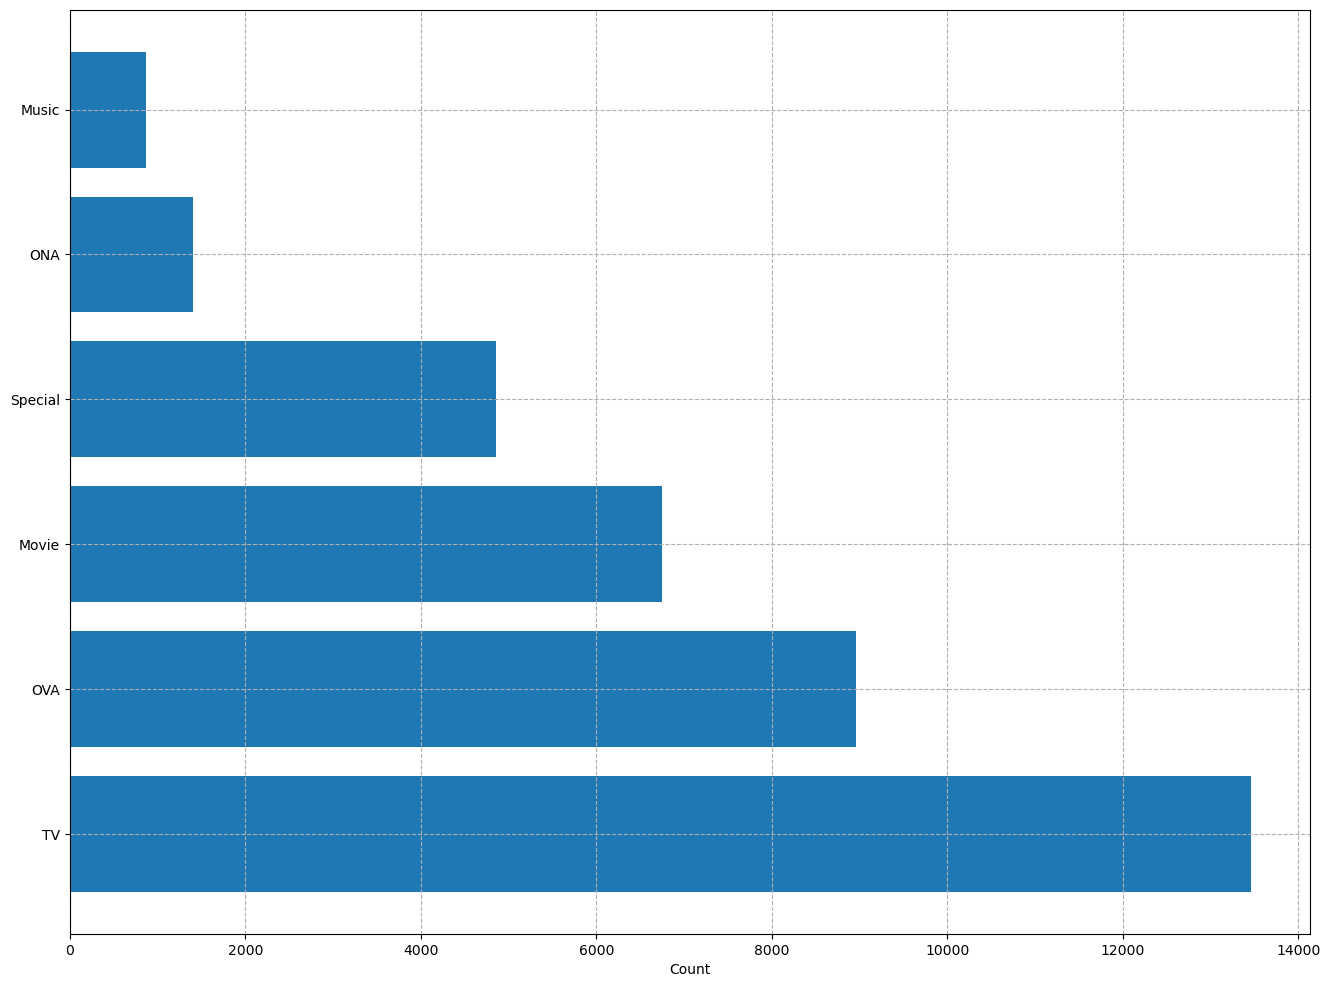

In [150]:
plot_category_count(type)

In [151]:
rating=(df_rating.groupby("rating")
        .count()["user_id"]
        .sort_values(ascending=False))

In [20]:
rating

rating
8     1646019
7     1375287
9     1254096
10     955715
6      637775
5      282806
4      104291
3       41453
2       23150
1       16649
Name: user_id, dtype: int64

(<Figure size 1600x1200 with 1 Axes>, <AxesSubplot:xlabel='Count'>)

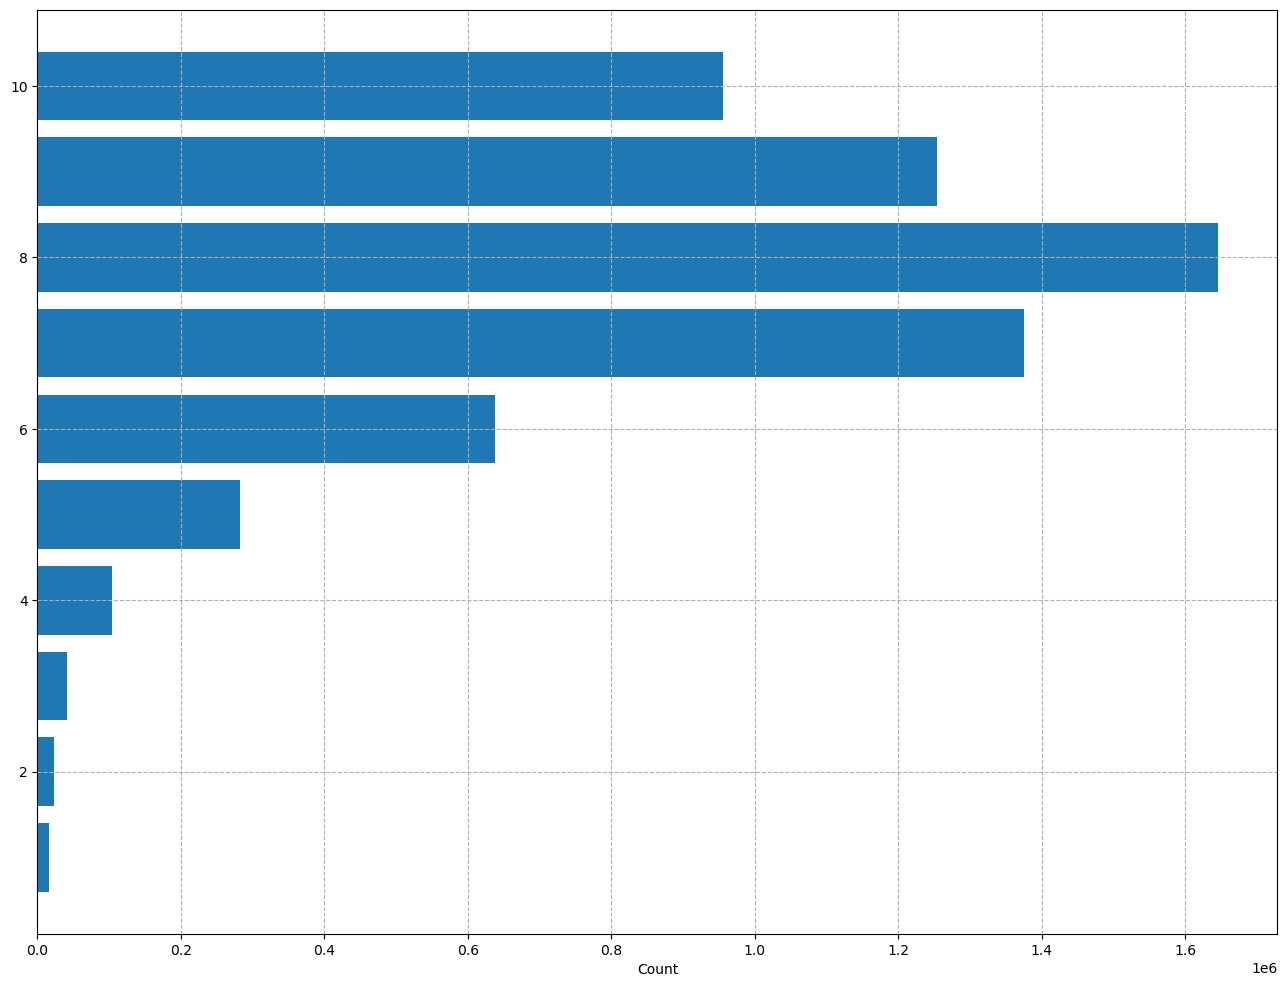

In [152]:
plot_category_count(rating)

# Esparcidade
* Esparsidade é um conceito que utilizamos para medir quantos dados estão faltando no nosso dataset para entendermos o usuário. Os usuários não costumam avaliar a maioria dos itens que você tem no seu sistema de recomendação.

In [153]:
df_rating["user_id"].describe()

count    7.813737e+06
mean     3.672796e+04
std      2.099795e+04
min      1.000000e+00
25%      1.897400e+04
50%      3.679100e+04
75%      5.475700e+04
max      7.351600e+04
Name: user_id, dtype: float64

In [155]:
n_user=df_rating["user_id"].nunique()
n_itens=df_rating["anime_id"].nunique()
n_rating=df_rating[["user_id","anime_id"]].drop_duplicates().shape[0]

In [154]:
df_rating[["user_id","anime_id"]].shape[0]

7813737

In [158]:
df_rating.drop_duplicates(subset=["user_id","anime_id"],inplace=True)
df_rating=df_rating.reset_index(drop=True)

In [159]:
df_rating[["user_id","anime_id"]].shape[0]

7813730

In [157]:
print(f"USER: {n_user}")
print(f"Itens: {n_itens}")
print(f"rating: {n_rating}")

USER: 73515
Itens: 11200
rating: 7813730


In [174]:
overral_sparcity= 1-n_rating/(n_user*n_itens)

print("overall sparcity:{:.02f}%".format(100*overral_sparcity))

overall sparcity:99.05%


In [179]:
df_rec=df_rating.merge(df_anime, how="left", on="anime_id")

In [182]:
df_rec

,user_id,anime_id,rating,name,genre,type,genre_list
0,1,20,None,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,"[Action, Comedy, Martial Arts, Shounen, Su..."
1,1,24,None,School Rumble,"Comedy, Romance, School, Shounen",TV,"[Comedy, Romance, School, Shounen]"
2,1,79,None,Shuffle,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,"[Comedy, Drama, Ecchi, Fantasy, Harem, Ma..."
3,1,226,None,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,"[Action, Drama, Horror, Psychological, Rom..."
4,1,241,None,Girls Bravo First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,"[Comedy, Ecchi, Fantasy, Harem, Romance, ..."
...,...,...,...,...,...,...,...
7813725,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,"[Action, Demons, Supernatural]"
7813726,73515,17187,9,Ghost in the Shell Arise Border1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,"[Mecha, Police, Psychological, Sci-Fi]"
7813727,73515,22145,10,Kuroshitsuji Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,"[Comedy, Demons, Fantasy, Historical, Shou..."
7813728,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,"[Mystery, Psychological, Sci-Fi]"


In [185]:
df_rec.describe().round(2)

,user_id,anime_id
count,7813730.00,7813730.00
mean,36727.95,8909.07
std,20997.95,8883.95
min,1.00,1.00
25%,18974.00,1240.00
50%,36791.00,6213.00
75%,54757.00,14093.00
max,73516.00,34519.00


In [186]:
df_rec=df_rec.reset_index(drop=True)

In [187]:
df_rec

,user_id,anime_id,rating,name,genre,type,genre_list
0,1,20,None,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,"[Action, Comedy, Martial Arts, Shounen, Su..."
1,1,24,None,School Rumble,"Comedy, Romance, School, Shounen",TV,"[Comedy, Romance, School, Shounen]"
2,1,79,None,Shuffle,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,"[Comedy, Drama, Ecchi, Fantasy, Harem, Ma..."
3,1,226,None,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,"[Action, Drama, Horror, Psychological, Rom..."
4,1,241,None,Girls Bravo First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,"[Comedy, Ecchi, Fantasy, Harem, Romance, ..."
...,...,...,...,...,...,...,...
7813725,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,"[Action, Demons, Supernatural]"
7813726,73515,17187,9,Ghost in the Shell Arise Border1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,"[Mecha, Police, Psychological, Sci-Fi]"
7813727,73515,22145,10,Kuroshitsuji Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,"[Comedy, Demons, Fantasy, Historical, Shou..."
7813728,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,"[Mystery, Psychological, Sci-Fi]"


In [220]:
df_preference=pd.pivot_table(
    df_rec,
    index="user_id",
    columns="name",
    values="rating",
    aggfunc="sum"
   
).fillna(0)


In [231]:
# completando o valores faltantes com 0
df_preference=df_preference.fillna(0)

In [221]:
df_preference

name,,0,0008,001,009 ReCyborg,0091,0091 RB,07Ghost,0sen Hayato,100,...,lilac bombs Jun Togawa,makemagic,onchan Yume Power Daibouken,sCRYed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


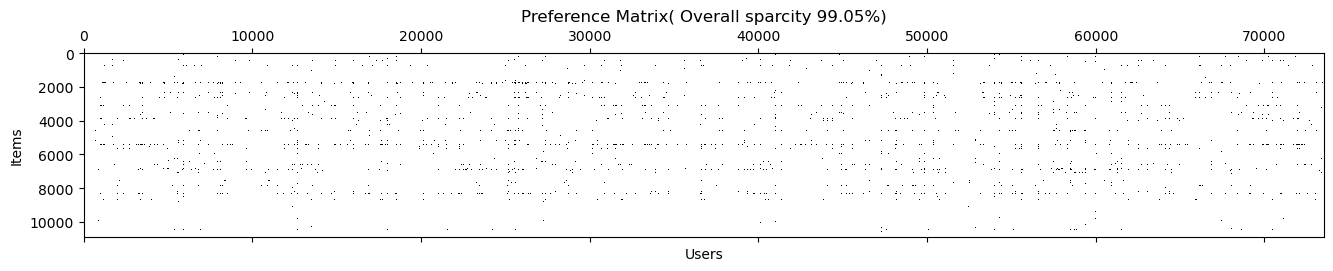

In [190]:
#plotando matriz esparca/ podemos ver que a nossa matriz esta bem esparca
plot_preferences_matrix(df_preference, overral_sparcity)

### Calculando esparcidade de usuario
* User Specific Sparcity USS
* USS(u)= 1 - #ratingsu/#items
* Item Specific Sparcity ISS
* ISS(i)=1 - #ratingsi/#users


* Observamos quase todos os usuarios nao avaliam as os nossos videos

In [191]:
#USS
user_ratings=df_rating.groupby("user_id").count()["anime_id"]
user_sparcity=1- user_ratings/n_itens
user_sparcity


user_id
1        0.986339
2        0.999732
3        0.991607
4        0.995357
5        0.958304
           ...   
73512    0.998839
73513    0.997054
73514    0.999911
73515    0.982500
73516    0.999821
Name: anime_id, Length: 73515, dtype: float64

* Observamos que muitos animes nao sao avaliados.


In [193]:
#ISS
item_ratings=df_rating.groupby("anime_id").count()["user_id"]
item_sparcity=1- item_ratings/n_user
item_sparcity

anime_id
1        0.789036
5        0.905774
6        0.849323
7        0.964239
8        0.994382
           ...   
34367    0.999932
34412    0.999986
34475    0.999946
34476    0.999986
34519    0.999986
Name: user_id, Length: 11200, dtype: float64

(<Figure size 1600x1200 with 1 Axes>,
 <AxesSubplot:xlabel='Sparsity', ylabel='Users'>)

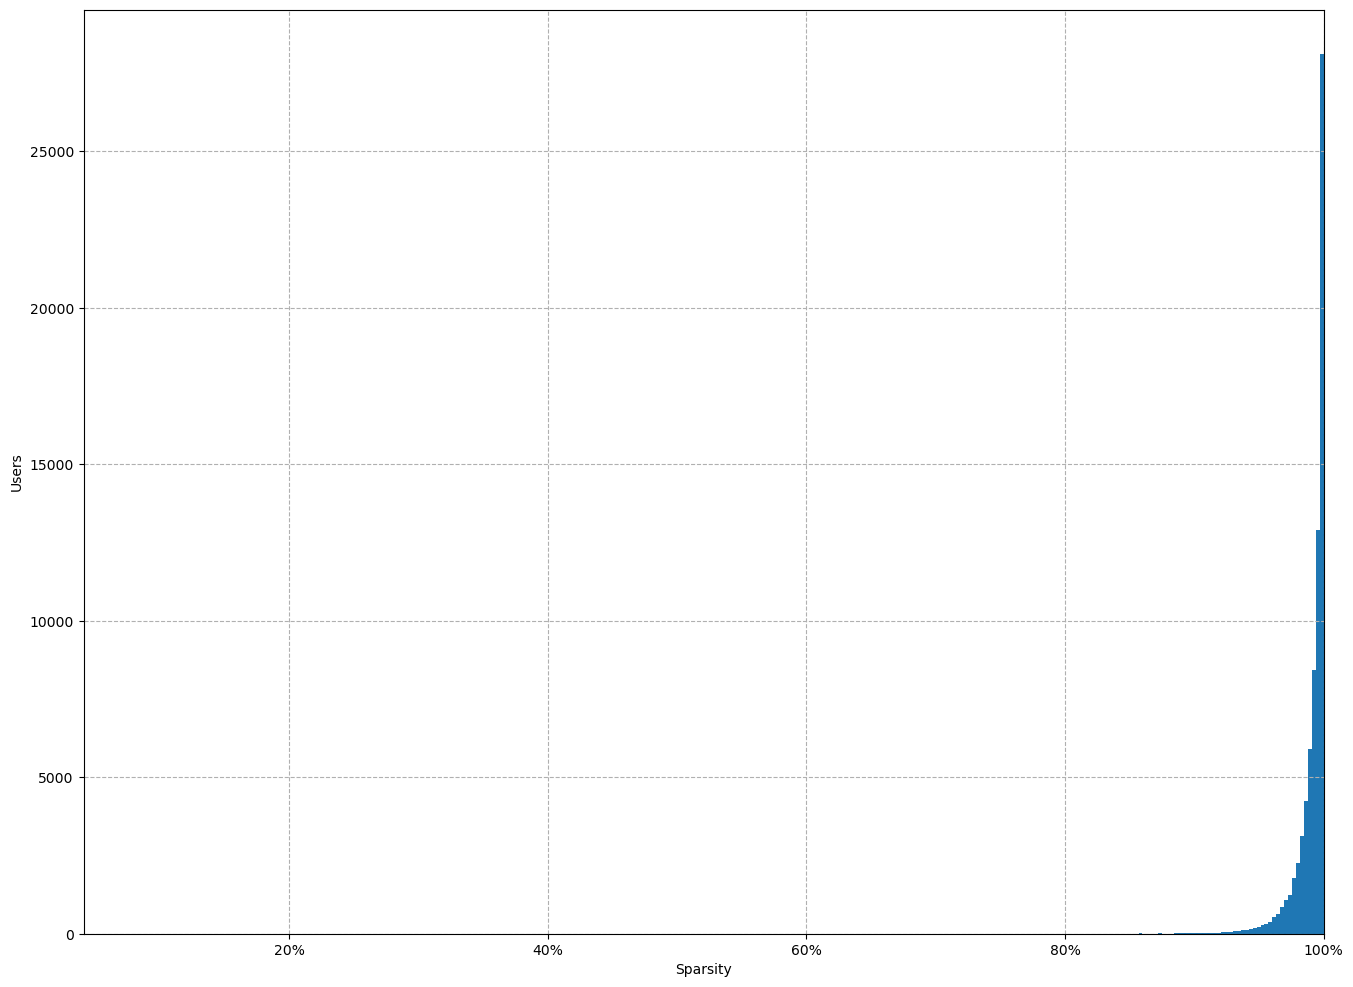

In [194]:
sparcity_distribution_plot(user_sparcity, ylabel="Users")

*Por que isso acontece? Justamente porque os usuários não costumam avaliar todos os itens disponíveis em um determinado catálogo.

(<Figure size 1600x1200 with 1 Axes>,
 <AxesSubplot:xlabel='Sparsity', ylabel='Item'>)

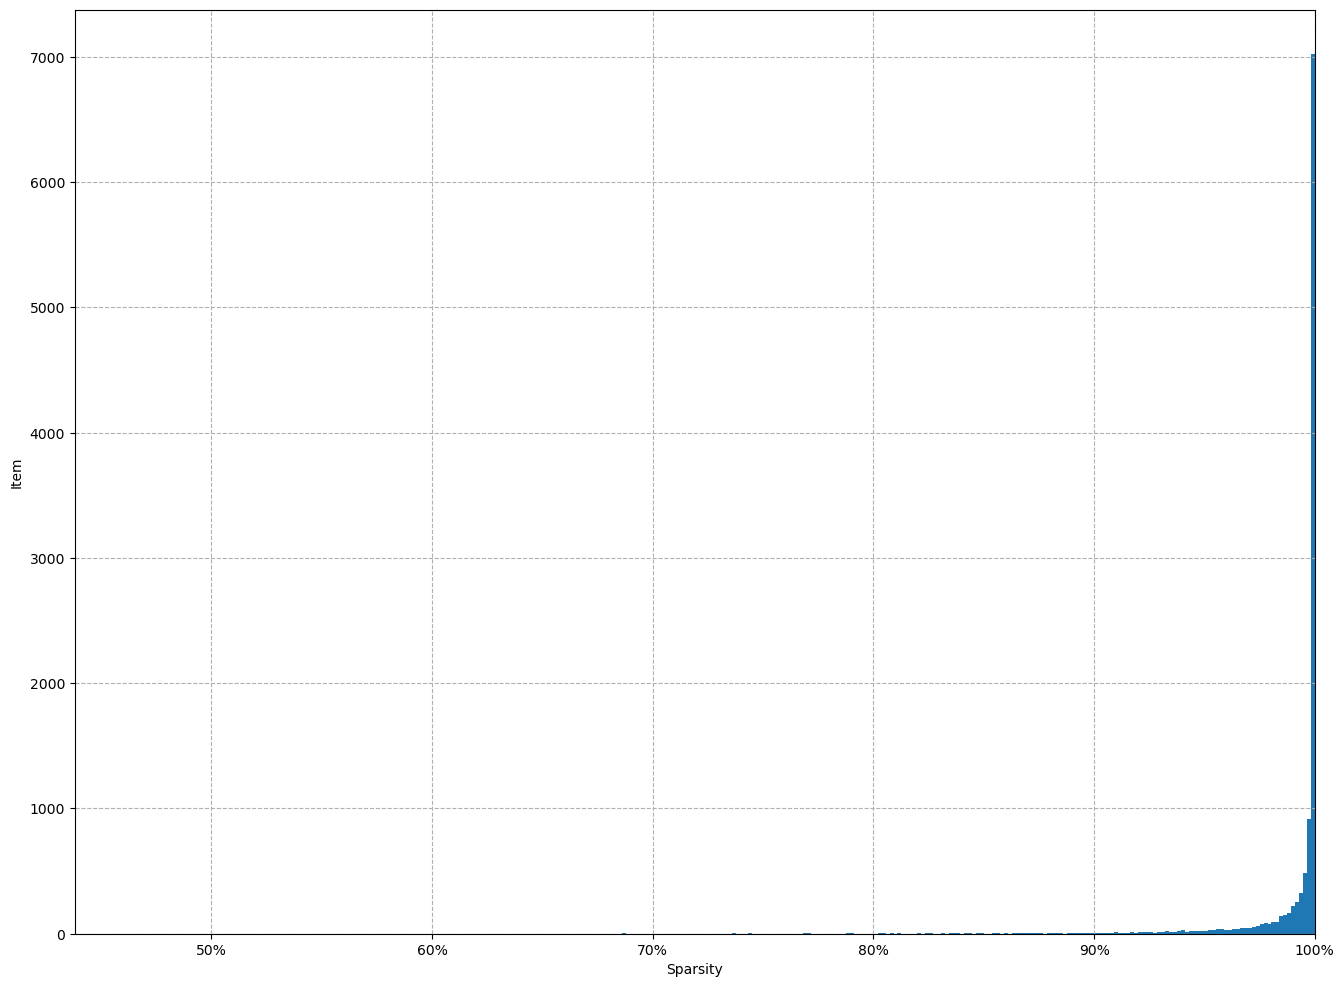

In [195]:
sparcity_distribution_plot(item_sparcity, ylabel="Item")

In [176]:
#substituindo NAn type na No Class
df_rec.type=df_rec.type.fillna("No Class")

In [196]:
df_rec.head(1)

,user_id,anime_id,rating,name,genre,type,genre_list
0,1,20,None,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,"[Action, Comedy, Martial Arts, Shounen, Su..."


# Recomendacao top N nas suas diversas categorias

## Mais avaliado pelos usuarios

In [198]:
#instanciando a classe
top_n_recommender=top_recommender(df_rec)

In [199]:
top_n_recommender.best_rating(n=10)

,name,anime_id,rating
3275,Hamster Club,9900,10.0
1351,Chogattai Majutsu Robot Ginguiser Specials,16041,10.0
10383,Whats Michael TV,12039,10.0
3475,Hello Kitty no Mahou no Ringo,22479,10.0
7499,Play Ball 2nd,3769,10.0
5800,Mak Dau Goo Si,9817,10.0
5801,Mak Dau Xiang Dang Dang,9819,10.0
4640,Kawasaki Frontale x Tentai Senshi Sunred 2nd S...,8196,10.0
4707,Kero Kero Keroppi no Kero Kero House no Himitsu,22615,10.0
214,Ajisai no Uta,27557,10.0


In [200]:
#top 10 vezes avaliado
top_n_recommender.recommender_user(10)

,name,anime_id,score
1769,Death Note,1535,39340
9252,Sword Art Online,11757,30582
8614,Shingeki no Kyojin,16498,29583
1492,Code Geass Hangyaku no Lelouch,1575,27717
2287,Elfen Lied,226,27506
356,Angel Beats,6547,27183
6594,Naruto,20,25925
2516,Fullmetal Alchemist,121,25032
2517,Fullmetal Alchemist Brotherhood,5114,24574
9840,Toradora,4224,24283


## Melhor avaliado geral

In [201]:
top_n_recommender.best_rating(n=10)

,name,anime_id,rating
3275,Hamster Club,9900,10.0
1351,Chogattai Majutsu Robot Ginguiser Specials,16041,10.0
10383,Whats Michael TV,12039,10.0
3475,Hello Kitty no Mahou no Ringo,22479,10.0
7499,Play Ball 2nd,3769,10.0
5800,Mak Dau Goo Si,9817,10.0
5801,Mak Dau Xiang Dang Dang,9819,10.0
4640,Kawasaki Frontale x Tentai Senshi Sunred 2nd S...,8196,10.0
4707,Kero Kero Keroppi no Kero Kero House no Himitsu,22615,10.0
214,Ajisai no Uta,27557,10.0


## Melhor avaliado type

In [202]:
#top 10  recomendacao para tipo de anime
#1:TV, 2:Movie 3:OVA 4:Special 5:Ona 6:Music 7: No class
top_n_recommender.recommender_type(n=10,type=1)

,anime_id,name,score
686,1535,Death Note,39340
2310,11757,Sword Art Online,30582
2554,16498,Shingeki no Kyojin,29583
714,1575,Code Geass Hangyaku no Lelouch,27717
150,226,Elfen Lied,27506
1787,6547,Angel Beats,27183
9,20,Naruto,25925
79,121,Fullmetal Alchemist,25032
1597,5114,Fullmetal Alchemist Brotherhood,24574
1469,4224,Toradora,24283


# Item based Collaborative filtereing 

In [203]:
df_rec

,user_id,anime_id,rating,name,genre,type,genre_list
0,1,20,None,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,"[Action, Comedy, Martial Arts, Shounen, Su..."
1,1,24,None,School Rumble,"Comedy, Romance, School, Shounen",TV,"[Comedy, Romance, School, Shounen]"
2,1,79,None,Shuffle,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,"[Comedy, Drama, Ecchi, Fantasy, Harem, Ma..."
3,1,226,None,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,"[Action, Drama, Horror, Psychological, Rom..."
4,1,241,None,Girls Bravo First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,"[Comedy, Ecchi, Fantasy, Harem, Romance, ..."
...,...,...,...,...,...,...,...
7813725,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,"[Action, Demons, Supernatural]"
7813726,73515,17187,9,Ghost in the Shell Arise Border1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,"[Mecha, Police, Psychological, Sci-Fi]"
7813727,73515,22145,10,Kuroshitsuji Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,"[Comedy, Demons, Fantasy, Historical, Shou..."
7813728,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,"[Mystery, Psychological, Sci-Fi]"


In [222]:
df_preference

name,,0,0008,001,009 ReCyborg,0091,0091 RB,07Ghost,0sen Hayato,100,...,lilac bombs Jun Togawa,makemagic,onchan Yume Power Daibouken,sCRYed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
def get_similarity_matrix( df_preference:pd.DataFrame, user: np.array= None)->pd.DataFrame:

    item_idx=df_preference.columns
    if user is None:    
        user=df_preference.index
    similarity_matrix=cosine_similarity(df_preference.loc[user].T)
    similarity_matrix=pd.DataFrame(
        similarity_matrix,
        index=item_idx,
        columns=item_idx
    )
    return similarity_matrix
similarity= get_similarity_matrix(df_preference, user=None)

In [ ]:
similarity

In [232]:
#extraindo a similirade para 
similarity.loc["07Ghost"]

name
                                          0.003681
0                                         0.012233
0008                                      0.013753
001                                       0.014956
009 ReCyborg                              0.054678
                                            ...   
xxxHOLiC                                  0.192615
xxxHOLiC Kei                              0.184002
xxxHOLiC Movie Manatsu no Yoru no Yume    0.139387
xxxHOLiC Rou                              0.142343
xxxHOLiC Shunmuki                         0.162695
Name: 07Ghost, Length: 10879, dtype: float64

In [238]:
def recommend_n_most_similars(item_id: int, similarity: pd.DataFrame, n: int):
    assert item_id in similarity.index
    item_similarities = similarity.loc[item_id]
    top_n_similar = (
        item_similarities
        .sort_values(ascending=False)
        .head(n)
        .reset_index()
        .rename(columns={item_id: "score"})
    )

    return top_n_similar


In [241]:
#recomendacao por titulos simlares
recomendation= recommend_n_most_similars(item_id="Naruto", similarity=similarity, n=10)
recomendation

,name,score
0,Naruto,1.000000
1,Death Note,0.551848
2,Fullmetal Alchemist,0.477675
3,Bleach,0.471522
4,Fullmetal Alchemist Brotherhood,0.469704
5,Code Geass Hangyaku no Lelouch,0.469305
6,Sword Art Online,0.469203
7,Shingeki no Kyojin,0.463703
8,Dragon Ball Z,0.457408
9,Naruto Movie 1 Dai Katsugeki Yuki Hime Shinobu...,0.453608


In [242]:
recomendation_death_notes= recommend_n_most_similars(item_id="Death Note", similarity=similarity, n=10)
recomendation_death_notes

,name,score
0,Death Note,1.000000
1,Code Geass Hangyaku no Lelouch,0.619840
2,Code Geass Hangyaku no Lelouch R2,0.592260
3,Elfen Lied,0.583024
4,Shingeki no Kyojin,0.574731
5,Fullmetal Alchemist Brotherhood,0.565031
6,Naruto,0.551848
7,Fullmetal Alchemist,0.551835
8,Sword Art Online,0.539527
9,Angel Beats,0.518205


# Recommendation most active user

In [265]:
#most frequent users

most_frequent_user=(df_rec                
 .groupby(["user_id"])["name"]
 .count()
 .sort_values(ascending=False)
 .head(200))

most_frequent_user

user_id
48766    10115
42635     3745
53698     2905
57620     2658
59643     2596
         ...  
8006      1039
59362     1036
26691     1034
35356     1032
37929     1032
Name: name, Length: 200, dtype: int64

In [260]:
#similarity matrix for their uses
top_user_similarity=get_similarity_matrix(df_preference, user=most_frequent_user.index)

In [266]:
#testing the top 10 movies for them
recommend_n_most_similars(item_id="Naruto", similarity=top_user_similarity, n=10)


,name,score
0,Naruto,1.000000
1,Naruto Movie 1 Dai Katsugeki Yuki Hime Shinobu...,0.798900
2,Naruto Movie 2 Dai Gekitotsu Maboroshi no Chit...,0.776971
3,Soul Eater,0.772366
4,Naruto Shippuuden Movie 1,0.762902
5,Naruto Shippuuden Movie 2 Kizuna,0.758595
6,Naruto Movie 3 Dai Koufun Mikazuki Jima no Ani...,0.754499
7,Bleach,0.753422
8,Highschool of the Dead,0.749425
9,Bleach Movie 1 Memories of Nobody,0.747350
